In [1]:
import pandas as pd


In [2]:
pip install PyPDF2

  Stored in directory: C:\Users\samee\AppData\Local\pip\Cache\wheels\53\84\19\35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import PyPDF2

In [4]:
pdfFileObj = open('Sameer_Ranjan_Resume_.pdf', 'rb')

In [5]:
pdfFileObj


<_io.BufferedReader name='Sameer_Ranjan_Resume_.pdf'>

In [6]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [7]:
pdfReader

In [9]:
pageObj = pdfReader.getPage(0)

In [10]:
print(pageObj.extractText())

                                                    
Sameer Ranjan
 
Dallas, TX
 
| 
sameer.ranjan@utdallas.edu
 
| 
(972)
 
342
-
8570
 
| UTD Golden Comet Winner (2020) | SAFE Grant Winner (Summer 2020)
 
EDUCATION
 
The University of Texas at Dallas
 
 
Richardson, TX
 
M.S.
 
in Business Analytics
 
| 
GPA
:
 
3.7
 
Dec
.
 
2020
 
Graduate Teaching Assistantship 

 
Robotics Process Automation (2019)
 
National Institute of Technology
,
 
Raipur 
 
Raipur, India
 
B.T
ech
 
in 
Engineering
 
(Hon
ors
)
 
| 
GPA
:
 
4.0
 
May 2017
 
CERTIFICATIONS & SKILLS
 
Certifications
: 
Automation Anywhere RPA Business Analyst, UI Path RPA Business Analyst 
 
Analysis Tools
:
 
R studio
, R Shiny
, Python
 
(Pandas, Scikit
-
learn, NumPy, Seaborn, Matplotlib), H20.Ai, Google Analytics, SAS
 
Programming
:
 
Python ( Keras, TensorFlow, NLTK), R, SQL, MATL
AB, Octave, Stata, SAS
, C
/C++, Flask
 
Databases
: MS
-
SQL, Oracle Live, MySQL, MongoDB, Hadoop (PySpark, Hive, Pig, Impala, Sqoop), Alter

In [17]:
type(pageObj)

PyPDF2.pdf.PageObject

In [14]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus

In [15]:
text = pageObj

In [16]:
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token

TypeError: expected string or bytes-like object

In [2]:
pip install textract

  Stored in directory: C:\Users\samee\AppData\Local\pip\Cache\wheels\84\11\01\951369cbbf8f96878786a1f4da68bd7ac19a5d945b38e03d54
  Stored in directory: C:\Users\samee\AppData\Local\pip\Cache\wheels\1f\1f\2c\29acca422b420a0b5210bd2cd7e9669804520d602d2462f20b
  Stored in directory: C:\Users\samee\AppData\Local\pip\Cache\wheels\b2\1f\26\a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
  Stored in directory: C:\Users\samee\AppData\Local\pip\Cache\wheels\15\ae\df\a67bf1ed84e9bf230187d36d8dcfd30072bea0236cb059ed91
Successfully built EbookLib python-pptx docx2txt tzlocal
  Found existing installation: beautifulsoup4 4.7.1
    Uninstalling beautifulsoup4-4.7.1:
      Successfully uninstalled beautifulsoup4-4.7.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import PyPDF2
import textract
import re

In [15]:
filename ='Sameer_Ranjan_Resume_.pdf' 

pdfFileObj = open(filename,'rb')               #open allows you to read the file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)   #The pdfReader variable is a readable object that will be parsed
num_pages = pdfReader.numPages                 #discerning the number of pages will allow us to parse through all the pages


count = 0
text = ""
                                                            
while count < num_pages:                       #The while loop will read each page
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    
#Below if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.

if text != "":
    text = text
    
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text

else:
    text = textract.process('http://bit.ly/epo_keyword_extraction_document', method='tesseract', language='eng')

    # Now we have a text variable which contains all the text derived from our PDF file.

In [17]:
text = text.lower() #Lowercasing each word

In [7]:
text

b'                                                    \nsameer ranjan\n \ndallas, tx\n \n| \nsameer.ranjan@utdallas.edu\n \n| \n(972)\n \n342\n-\n8570\n \n| utd golden comet winner (2020) | safe grant winner (summer 2020)\n \neducation\n \nthe university of texas at dallas\n \n \nrichardson, tx\n \nm.s.\n \nin business analytics\n \n| \ngpa\n:\n \n3.7\n \ndec\n.\n \n2020\n \ngraduate teaching assistantship \n\n \nrobotics process automation (2019)\n \nnational institute of technology\n,\n \nraipur \n \nraipur, india\n \nb.t\nech\n \nin \nengineering\n \n(hon\nors\n)\n \n| \ngpa\n:\n \n4.0\n \nmay 2017\n \ncertifications & skills\n \ncertifications\n: \nautomation anywhere rpa business analyst, ui path rpa business analyst \n \nanalysis tools\n:\n \nr studio\n, r shiny\n, python\n \n(pandas, scikit\n-\nlearn, numpy, seaborn, matplotlib), h20.ai, google analytics, sas\n \nprogramming\n:\n \npython ( keras, tensorflow, nltk), r, sql, matl\nab, octave, stata, sas\n, c\n/c++, flask\n \ndata

In [18]:
keywords = re.findall(r'[a-zA-Z]\w+',text)
len(keywords)                               #Total keywords in document

583

In [19]:

df = pd.DataFrame(list(set(keywords)),columns=['keywords'])  #Dataframe with unique keywords to avoid repetition in rows

In [20]:
def weightage(word,text,number_of_documents=1):
    word_list = re.findall(word,text)
    number_of_times_word_appeared =len(word_list)
    tf = number_of_times_word_appeared/float(len(text))
    idf = np.log((number_of_documents)/float(number_of_times_word_appeared))
    tf_idf = tf*idf
    return number_of_times_word_appeared,tf,idf ,tf_idf

In [21]:
df['number_of_times_word_appeared'] = df['keywords'].apply(lambda x: weightage(x,text)[0])
df['tf'] = df['keywords'].apply(lambda x: weightage(x,text)[1])
df['idf'] = df['keywords'].apply(lambda x: weightage(x,text)[2])
df['tf_idf'] = df['keywords'].apply(lambda x: weightage(x,text)[3])

In [22]:
df = df.sort_values('tf_idf',ascending=True)
df.to_csv('Keywords.csv')
df.head(25)

,keywords,number_of_times_word_appeared,tf,idf,tf_idf
155,in,91,0.018903,-4.510860,-0.085270
168,an,70,0.014541,-4.248495,-0.061777
157,or,52,0.010802,-3.951244,-0.042681
282,ng,49,0.010179,-3.891820,-0.039613
110,on,43,0.008932,-3.761200,-0.033596
191,at,41,0.008517,-3.713572,-0.031628
69,to,30,0.006232,-3.401197,-0.021196
145,as,26,0.005401,-3.258097,-0.017597
272,and,21,0.004362,-3.044522,-0.013281
137,for,21,0.004362,-3.044522,-0.013281


In [23]:

from gensim.summarization import keywords
import warnings
warnings.filterwarnings("ignore")

In [24]:

values = keywords(text=text,split='\n',scores=True)

In [25]:
data = pd.DataFrame(values,columns=['keyword','score'])
data = data.sort_values('score',ascending=False)
data.head(10)

,keyword,score
0,data,0.197445
1,work,0.183548
2,worked,0.183548
3,learn,0.172598
4,processes,0.159682
5,machine learning,0.143782
6,modeled,0.140632
7,india,0.135685
8,business analytics,0.131314
9,process automation,0.128904


In [37]:

from rake_nltk import Rake

In [36]:
pip install rake-nltk

  Stored in directory: C:\Users\samee\AppData\Local\pip\Cache\wheels\ef\92\fc\271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk
Note: you may need to restart the kernel to use updated packages.


In [39]:

r = Rake()
r.extract_keywords_from_text(text)

In [40]:
phrases = r.get_ranked_phrases_with_scores()

In [42]:
table = pd.DataFrame(phrases,columns=['score','Phrase'])
table = table.sort_values('score',ascending=False)
table.head(10)


,score,Phrase
0,244.583333,supp ort vector machine r esearch p aper busin...
1,92.500000,india machine learning engineer june 2017 may ...
2,65.333333,mimicking human efforts via ai bots created iq...
3,60.750000,hoc queries srg consulting project behavioral ...
4,46.916667,2020 graduate teaching assistantship robotics ...
5,44.000000,kanban work experience american heart associat...
6,43.333333,food brand segmented data using rfm technique
7,42.000000,ui path rpa business analyst analysis tools
8,36.083333,india business marketing analyst june nov
9,36.000000,shops generating 100 million dollars prediction


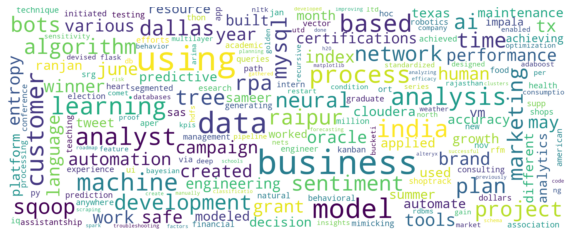

In [46]:
all_words = ' '.join([text for text in table['Phrase']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=800, random_state=21, background_color = "white", max_font_size=120).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [47]:
job_desc = input()

Determines approach and solutions to problems when issue is within scope of own ability. Applies analytical thinking skills to diagnose and make recommendations on system and, or work process flows. Incorporates knowledge of business and technology to make recommendations. Translates data gathered from user discussions into business requirements. Identifies business/system needs and recommends solutions. Assists with the testing strategies and develops preliminary findings. Partners with Project Management, core business teams to create project documents, project plans, implementation timeline and success criteria. Partners with business to analyze processes and needs and makes recommendations that are most effective means to satisfy those needs. Analyses the most complex work procedures and job methods and presents concepts to simplify those procedures. Work is performed and technical decisions are made with a clear partnership with SMEs in the business. As a result, a strong understa

In [48]:
p = Rake()
p.extract_keywords_from_text(job_desc)

In [49]:
phrase = p.get_ranked_phrases_with_scores()

In [51]:
table1 = pd.DataFrame(phrase,columns=['score','Phrase'])
table1 = table1.sort_values('score',ascending=False)
table1.head(10)

,score,Phrase
0,16.000000,applies analytical thinking skills
2,9.000000,manages projects according
3,9.000000,develops preliminary findings
4,9.000000,completes tasks assigned
5,9.000000,accomplish organizational goals
1,9.000000,translates data gathered
6,8.500000,less experienced staff
7,8.333333,work process flows
8,8.250000,create project documents
9,8.200000,core business teams


In [ ]:
all_words = ' '.join([text for text in table1['Phrase']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=800, random_state=21, background_color = "white", max_font_size=120).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
resume = input()

In [ ]:
from nltk.tokenize import word_tokenize